In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import mglearn

In [12]:
#одномерные статистики
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split

data = load_breast_cancer()
rng=np.random.RandomState(42)
noise=rng.normal(size=(len(data.data),50))

X_w_noise=np.hstack([data.data, noise])
X_train, X_test, y_train, y_test=train_test_split(X_w_noise, data.target, random_state=0, test_size=0.5)

select=SelectPercentile(percentile=50)
select.fit(X_train, y_train)
X_train_selected = select.transform(X_train)

print(X_train.shape)
print(X_train_selected.shape)

(284, 80)
(284, 40)


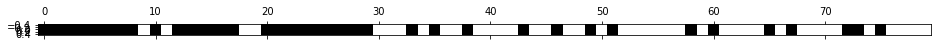

In [13]:
mask=select.get_support()
plt.matshow(mask.reshape(1,-1),cmap='gray_r')

In [24]:
#отбор признков на основе модели
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

select=SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42), threshold='median')
select.fit(X_train, y_train)
X_train_l1=select.transform(X_train)
print(X_train.shape)
print(X_train_l1.shape)

(284, 80)
(284, 40)


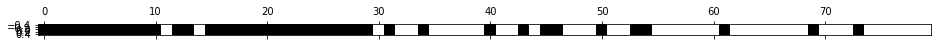

In [28]:
mask=select.get_support()
plt.matshow(mask.reshape(1,-1), cmap='gray_r')

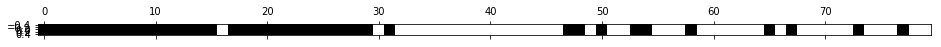

In [30]:
#итеративный отбор признаков
from sklearn.feature_selection import RFE

select=RFE(RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=40)
select.fit(X_train, y_train)
mask=select.get_support()
plt.matshow(mask.reshape(1,-1),cmap='gray_r')